# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [7]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [8]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

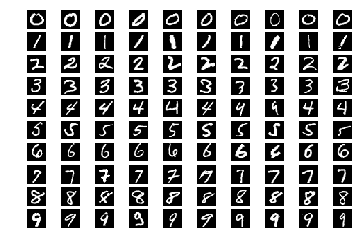

In [9]:
# convert labels to ints
train_labels = train_labels.astype(int)
mini_train_labels = mini_train_labels.astype(int)
dev_labels = dev_labels.astype(int)
test_labels = test_labels.astype(int)

def P1(num_examples=10):
    d = np.zeros(10).astype(int) # to store number of examples showed for each digit
    for i in range(len(train_labels)): 
        if d[train_labels[i]] < num_examples:
            d[train_labels[i]] += 1
            pixels = train_data[i,]
            pixels = pixels.reshape(28, 28)
            plt.subplot(10, num_examples, num_examples*train_labels[i]+d[train_labels[i]])
            plt.axis('off')
            plt.imshow(pixels, cmap='gray') 
        if all(j == num_examples for j in d): 
            plt.show()   
            break
P1(10)        

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [10]:
def P2(k_values):
    for k in k_values:
        knn = KNeighborsClassifier(k)
        knn.fit(mini_train_data, mini_train_labels) 
        print ('Accuracy for k =', k, ' : ', knn.score(dev_data, dev_labels)) 
    knn = KNeighborsClassifier(1)
    knn.fit(mini_train_data, mini_train_labels) 
    pred = knn.predict(dev_data) 
    print ('Classification report for k = 1:')
    print (classification_report(dev_labels, pred))
    
k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy for k = 1  :  0.888
Accuracy for k = 3  :  0.878
Accuracy for k = 5  :  0.869
Accuracy for k = 7  :  0.865
Accuracy for k = 9  :  0.863
Classification report for k = 1:
             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER: The hardest digit is 9, it has the lowest f1-score.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [11]:
def P3(train_sizes, accuracies):
    knn = KNeighborsClassifier(1)
    for size in train_sizes:
        start_time = time.time()
        knn.fit(train_data[:size,], train_labels[:size]) 
        fit_time = time.time() - start_time
        start_time = time.time()
        accuracies.append(knn.score(dev_data, dev_labels))
        print ('Accuracy for size =', size, ' : ', accuracies[-1] , ' Fit time: ', fit_time, ' Prediction time: ', time.time() - start_time) 
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Accuracy for size = 100  :  0.72  Fit time:  0.0015690326690673828  Prediction time:  0.09358406066894531
Accuracy for size = 200  :  0.786  Fit time:  0.00185394287109375  Prediction time:  0.16475701332092285
Accuracy for size = 400  :  0.841  Fit time:  0.0030870437622070312  Prediction time:  0.3363058567047119
Accuracy for size = 800  :  0.884  Fit time:  0.005959987640380859  Prediction time:  0.6824538707733154
Accuracy for size = 1600  :  0.902  Fit time:  0.015911102294921875  Prediction time:  1.4131920337677002
Accuracy for size = 3200  :  0.926  Fit time:  0.05406689643859863  Prediction time:  2.9385929107666016
Accuracy for size = 6400  :  0.937  Fit time:  0.19950628280639648  Prediction time:  6.1431639194488525
Accuracy for size = 12800  :  0.959  Fit time:  0.6682968139648438  Prediction time:  12.109007835388184
Accuracy for size = 25000  :  0.97  Fit time:  2.255868911743164  Prediction time:  23.913665056228638


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [12]:
def P4():
    reg = LinearRegression().fit(np.array(train_sizes).reshape(-1, 1), np.array(accuracies).reshape(-1, 1))
    print ('Predicted accuracy for 60000 train size: ', reg.predict(np.array([[60000]])))

P4()

Predicted accuracy for 60000 train size:  [[1.24307226]]


ANSWER: But accuracy can only be between 0 and 1. To model 0..1 outcome we should try fitting logistic regression.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Dev set accuracy for 60000 train size:  0.977
Confusion matrix for the dev set: 
[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]]
Mismathces, actual vs predicted: 


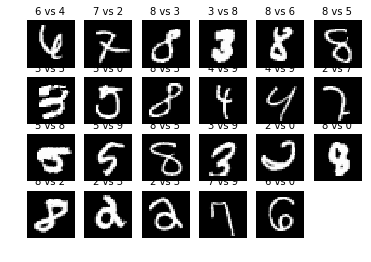

In [13]:
def P5():
    knn = KNeighborsClassifier(1)
    knn.fit(train_data, train_labels) 
    pred = knn.predict(dev_data)
    print ('Dev set accuracy for 60000 train size: ', np.mean(pred == dev_labels)) 
    print ('Confusion matrix for the dev set: ')
    print (confusion_matrix(dev_labels, pred))
    print ('Mismathces, actual vs predicted: ')
    subpl = 0
    for i in range(len(dev_labels)): 
        if dev_labels[i] != pred[i]:
            pixels = dev_data[i,]
            pixels = pixels.reshape(28, 28)
            subpl += 1
            ax = plt.subplot(4, 6, subpl)
            ax.set_title('{} vs {}'.format(dev_labels[i], pred[i]), size=10)
            ax.axis('off')
            ax.imshow(pixels, cmap='gray') 
    plt.show() 
P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [15]:
from scipy.ndimage.filters import gaussian_filter

def P6():
    knn = KNeighborsClassifier(1)
    # blur train, but not dev
    knn.fit(np.apply_along_axis(lambda x: gaussian_filter(x.reshape(28, 28), 1).reshape(784,), 1, train_data), train_labels) 
    print (knn.score(dev_data, dev_labels))
    # blur dev, but not train
    knn.fit(train_data, train_labels) 
    print (knn.score(np.apply_along_axis(lambda x: gaussian_filter(x.reshape(28, 28), 1).reshape(784,), 1, dev_data), dev_labels))
    # blur both train and dev
    knn.fit(np.apply_along_axis(lambda x: gaussian_filter(x.reshape(28, 28), 1).reshape(784,), 1, train_data), train_labels) 
    print (knn.score(np.apply_along_axis(lambda x: gaussian_filter(x.reshape(28, 28), 1).reshape(784,), 1, dev_data), dev_labels))

P6()

0.979
0.957
0.978


ANSWER: Accuracy for blurred train but not dev approach are the highest, and sligthly higher than for unprocessed sets.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [16]:
def P7():
    # fit NB with mapping pixel values to 0, 1 
    BNB = BernoulliNB(binarize=0.5)
    BNB.fit(train_data, train_labels)
    print ('Accuracy for BernoulliNB: ', BNB.score(dev_data, dev_labels))
    # fit NB with mapping pixel values to 0, 1, 2 
    MNB = MultinomialNB()
    MNB.fit(np.digitize(train_data, [0,1.0/3,2.0/3])-1, train_labels)
    print ('Accuracy for MultinomialNB: ', MNB.score(np.digitize(dev_data, [0,1.0/3,2.0/3])-1, dev_labels)) 

P7()

Accuracy for BernoulliNB:  0.845
Accuracy for MultinomialNB:  0.826


ANSWER: The multi-class version didn't improve the result, accuracy is lower. It might be because additional pixel intensity level doesn't matter since the most important information is the countour of the digit itself.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [17]:
def P8(alphas):
    BNB = BernoulliNB(binarize=0.5)
    cvBNB = GridSearchCV(BNB, alphas, cv=5, iid=False, n_jobs=-1, refit=True)
    cvBNB.fit(train_data, train_labels)
    return cvBNB
    
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

print ('Best params: ', nb.best_params_)
print ('Dev set accuracy for the best alpha: ', nb.score(dev_data, dev_labels))

/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best params:  {'alpha': 0.0}
Dev set accuracy for the best alpha:  0.85


/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


ANSWER: The best found alpha is 0, in this case no smoothing was applied. The reason why it was chosen is that for such large dataset it might be unnecessary to apply smoothing. The dev set accuracy is slightly higher than in P7 with default alpha=1.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [30]:
def P9():
    GNB = GaussianNB()
    GNB.fit(train_data, train_labels)
    print ('Accuracy for GaussianNB: ', GNB.score(dev_data, dev_labels))
    print (GNB.theta_)
    print (GNB.sigma_)
    GNB = GaussianNB(var_smoothing=0.05) 
    GNB.fit(train_data, train_labels)
    print ('Accuracy for GaussianNB: ', GNB.score(dev_data, dev_labels))

P9()

Accuracy for GaussianNB:  0.571
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.99394972e-10 1.99394972e-10 1.99394972e-10 ... 1.99394972e-10
  1.99394972e-10 1.99394972e-10]
 [1.99394972e-10 1.99394972e-10 1.99394972e-10 ... 1.99394972e-10
  1.99394972e-10 1.99394972e-10]
 [1.99394972e-10 1.99394972e-10 1.99394972e-10 ... 1.99394972e-10
  1.99394972e-10 1.99394972e-10]
 ...
 [1.99394972e-10 1.99394972e-10 1.99394972e-10 ... 1.99394972e-10
  1.99394972e-10 1.99394972e-10]
 [1.99394972e-10 1.99394972e-10 1.99394972e-10 ... 1.99394972e-10
  1.99394972e-10 1.99394972e-10]
 [1.99394972e-10 1.99394972e-10 1.99394972e-10 ... 1.99394972e-10
  1.99394972e-10 1.99394972e-10]]


TypeError: __init__() got an unexpected keyword argument 'var_smoothing'

ANSWER: We saw that sigma estimate gets too small, and we tried to change default var_smoothing parameter. The new result is much closer to the BernoulliNB result.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

Learned probabilities for each label: 


/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


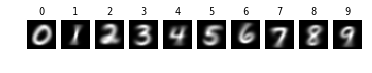

Generated examples for each digit: 


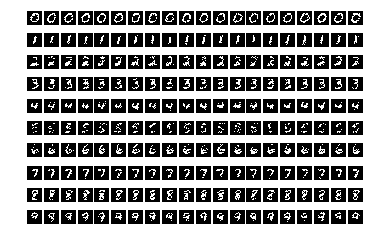

In [31]:
def P10(num_examples):
    BNB = BernoulliNB(alpha=0, binarize=0.5)
    BNB.fit(train_data, train_labels)

    print ('Learned probabilities for each label: ')
    for i in range(10):
        pixels = np.exp(BNB.feature_log_prob_[i,])
        pixels = pixels.reshape((28, 28))
        ax = plt.subplot(1, 10, i+1)
        ax.set_title('{}'.format(i), size=10)
        ax.axis('off')
        ax.imshow(pixels, cmap='gray') 
    plt.show() 
    
    print ('Generated examples for each digit: ')
    for i in range(10):
        for j in range(num_examples):
            # generate uniform values on [0,1] and see which smaller than learned probabilities, those set to 0, otherwise 1
            # here we make generation 5 times to ensure resulting images not too noisy
            pixels = (np.random.rand(784)+np.random.rand(784)+np.random.rand(784)+np.random.rand(784)+np.random.rand(784) < 5*np.exp(BNB.feature_log_prob_[i,])).astype(int)
            pixels = pixels.reshape((28, 28))
            ax = plt.subplot(10, num_examples, num_examples*i+j+1)
            ax.axis('off')
            ax.imshow(pixels, cmap='gray') 
    plt.show()
    
P10(20)

ANSWER: The generated digits are similar to the average digit examples with some distortions and noise.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [32]:
def P11(buckets, correct, total):
    BNB = BernoulliNB(alpha=0, binarize=0.5)
    BNB.fit(train_data, train_labels)
    for i in range(len(train_labels)):
        # identify to which bucket max posterior belongs
        ind = np.argmax(np.digitize(max(BNB.predict_proba(train_data[i,].reshape(1, -1))), buckets))-1
        total[ind] += 1
        if BNB.predict(train_data[i,].reshape(1, -1)) == train_labels[i]:
            correct[ind] += 1

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]
P11(buckets, correct, total)
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f total = %3d accuracy = %.3f' %(buckets[i], total[i], accuracy))

/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


p(pred) <= 0.5000000000000 total = 7361 accuracy = 0.870
p(pred) <= 0.9000000000000 total = 5556 accuracy = 0.882
p(pred) <= 0.9990000000000 total = 6306 accuracy = 0.783
p(pred) <= 0.9999900000000 total = 5621 accuracy = 0.831
p(pred) <= 0.9999999000000 total = 4962 accuracy = 0.800
p(pred) <= 0.9999999990000 total = 6045 accuracy = 0.891
p(pred) <= 0.9999999999900 total = 5690 accuracy = 0.931
p(pred) <= 0.9999999999999 total = 5945 accuracy = 0.754
p(pred) <= 1.0000000000000 total = 12514 accuracy = 0.820


ANSWER: We notice that most max posteriors belong to the last bucket, those values are very close 1. The highest accuracy was observed on the 7th bucket (0.9999999990000, 0.9999999999900].

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [34]:
def P12():
    # creating new features
    rowSums_train = np.zeros((len(train_labels), 28))
    colSums_train = np.zeros((len(train_labels), 28))
    rowSums_dev = np.zeros((len(dev_labels), 28))
    colSums_dev = np.zeros((len(dev_labels), 28))
    for i in range(len(train_labels)):
        pixels = train_data[i,].reshape(28,28)
        rowSums_train[i,] = pixels.sum(axis=1)
        colSums_train[i,] = pixels.sum(axis=0)
    for i in range(len(dev_labels)):
        pixels = dev_data[i,].reshape(28,28)
        rowSums_dev[i,] = pixels.sum(axis=1)
        colSums_dev[i,] = pixels.sum(axis=0)
    # passing old and new features into classifier
    BNB = BernoulliNB(alpha=0, binarize=0.5)
    BNB.fit(np.hstack((train_data, rowSums_train, colSums_train)), train_labels)
    print ('Accuracy with new features added: ', BNB.score(np.hstack((dev_data, rowSums_dev, colSums_dev)), dev_labels))
    
P12()

Accuracy with new features added:  0.843


/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


ANSWER: As we can see, accuracy didn't improve compared to the old result (0.845).